In [200]:
import sys
print(sys.prefix)

C:\Users\Mathiass\Anaconda3\envs\masterthesis


In [201]:
from pathlib import Path
import pandas as pd
import numpy as np
import quantstats as qs
import os

from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import *
from pandas.tseries.offsets import MonthEnd

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
# from mpt import portfolio_return 
import quantstats as qs
import dataframe_image as dfi

In [206]:
exp_path = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\logs\tune\nn_loops\20220808101241")

In [207]:
path_portfolios = exp_path/"portfolios"
dfs = []
for file in Path.iterdir(path_portfolios):
    try:
        df = pd.read_csv(path_portfolios/file, parse_dates=["date"], index_col="date")
    except PermissionError as err:
        raise PermissionError("The 'portfolios' subfolder must not contain directories.") from err
        # from err necessary for chaining
    dfs.append(df["option_ret"].rename(file.name[7:-4])) #rename Series to 'class0', 'class1', etc.
dfs = pd.concat(dfs, axis=1) # Series names -> column names

In [208]:
dfs

,class0,class1,,,ort0
date,,,,,
2020-01-31,0.440820,0.115048,0.440820,0.115048,-0.325772
2020-02-29,-0.518864,-0.162887,-0.518864,-0.162887,0.355977
2020-03-31,0.728928,1.725688,0.728928,1.725688,0.996760
2020-04-30,-0.040891,-0.082998,-0.040891,-0.082998,-0.042107
2020-05-31,0.163143,0.334069,0.163143,0.334069,0.170926
2020-06-30,0.467871,0.753239,0.467871,0.753239,0.285368
2020-07-31,-0.040914,-0.067202,-0.040914,-0.067202,-0.026287
2020-08-31,-0.052468,-0.064229,-0.052468,-0.064229,-0.011762
2020-09-30,-0.079049,-0.126253,-0.079049,-0.126253,-0.047205


In [4]:
import yfinance as yf

In [5]:
exp_dir = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\logs\tune\nn_loops\20220808101241")

In [6]:
agg_df = pd.read_csv(exp_dir/"portfolios"/"agg_df_class0.csv", parse_dates=["date"], index_col="date")

In [7]:
agg_df

,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,...,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret,id,pred,if_long_short,weights_0,weights_1
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,259.303870,11.250556,11.832008,61.374422,866.930035,0.345743,-0.013672,0.026626,37.316838,-26.165613,...,0.016377,11.541282,0.450571,0.549429,0.440820,16083.555047,0.0,-1.0,NaN,NaN
2020-02-29,253.697338,18.741429,20.024832,87.744568,1023.975786,0.464737,-0.100546,0.020463,45.769791,-33.154551,...,0.013039,19.383131,0.372316,0.627684,-0.518864,52187.080326,0.0,-1.0,NaN,NaN
2020-03-31,239.033489,19.337216,21.210567,63.937287,1279.520415,0.677345,-0.095013,0.017629,40.099403,-41.792263,...,0.008377,20.273892,0.308987,0.691013,0.728928,89251.646897,0.0,-1.0,NaN,NaN
2020-04-30,317.430594,22.688332,24.286700,72.096955,1311.234109,0.580473,-0.076063,0.018988,49.866009,-47.113255,...,0.003264,23.487516,0.277907,0.722093,-0.040891,122855.524862,0.0,-1.0,NaN,NaN
2020-05-31,251.667403,14.383397,15.256902,51.313980,1148.156612,0.507013,-0.056430,0.022703,38.439375,-31.515880,...,0.002565,14.820150,0.313161,0.686839,0.163143,155195.057809,0.0,-1.0,NaN,NaN
2020-06-30,313.858075,22.396452,23.400791,59.914232,1266.926451,0.543319,-0.048058,0.020842,47.822429,-48.464360,...,0.002392,22.898622,0.319993,0.680007,0.467871,185824.347500,0.0,-1.0,NaN,NaN
2020-07-31,382.130075,23.757123,24.774777,75.752262,1194.572763,0.471471,-0.086337,0.020915,56.405464,-49.327759,...,0.002042,24.265950,0.281653,0.718347,-0.040914,217120.748526,0.0,-1.0,NaN,NaN
2020-08-31,304.606022,25.244733,26.432460,87.383858,1185.387401,0.532277,-0.006916,0.021374,46.162191,-50.576414,...,0.002087,25.838597,0.353950,0.646050,-0.052468,250332.569404,0.0,-1.0,NaN,NaN
2020-09-30,324.347069,19.477965,20.343948,58.319846,1402.309093,0.496753,-0.051869,0.020560,45.648136,-50.429954,...,0.001929,19.910957,0.336439,0.663561,-0.079049,286539.505701,0.0,-1.0,NaN,NaN


In [8]:
end = agg_df.iloc[-1].name.to_pydatetime() + timedelta(days=1)
agg_df.iloc[-1].name.to_pydatetime() + timedelta(days=1)

datetime.datetime(2021, 12, 1, 0, 0)

In [9]:
# tickers = ["^SP500TR", "MSFT", "TSLA", "AAPL", "NFLX"]
tickers = ["^SP500TR"]

In [10]:
# sp = yf.Ticker(tickers)

In [11]:
# df1 = sp.history(end="2021-12-01", period="max", auto_adjust=False, prepost=False)

In [12]:
# df1

In [13]:
# end = datetime(2021, 12, 1)

In [14]:
end

datetime.datetime(2021, 12, 1, 0, 0)

In [15]:
df = yf.download(tickers=tickers, end=end, auto_adjust=False, prepost=False)

[*********************100%***********************]  1 of 1 completed


In [16]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-04,256.019989,256.019989,256.019989,256.019989,256.019989,0
1988-01-05,258.769989,258.769989,258.769989,258.769989,258.769989,0
1988-01-06,259.029999,259.029999,259.029999,259.029999,259.029999,0
1988-01-07,261.209991,261.209991,261.209991,261.209991,261.209991,0
1988-01-08,243.550003,243.550003,243.550003,243.550003,243.550003,0
...,...,...,...,...,...,...
2021-11-23,9789.089844,9832.070312,9735.080078,9814.650391,9814.650391,0
2021-11-24,9783.849609,9840.219727,9750.709961,9837.599609,9837.599609,0
2021-11-26,9760.750000,9760.750000,9595.200195,9614.250000,9614.250000,0


In [17]:
df_monthend = df.iloc[df.reset_index(drop=False).groupby(df.index.to_period("M"))["Date"].idxmax()]

In [18]:
df_monthend.index[-23:]

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-28', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
df_monthend.index = df_monthend.index + MonthEnd(0)
df_monthend.index[-23:]

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
df_monthend[-106:]["Close"]

Date
2013-02-28    2669.919922
2013-03-31    2770.050049
2013-04-30    2823.419922
2013-05-31    2889.459961
2013-06-30    2850.659912
                 ...     
2021-07-31    9155.209961
2021-08-31    9433.580078
2021-09-30    8994.830078
2021-10-31    9625.019531
2021-11-30    9558.330078
Name: Close, Length: 106, dtype: float64

In [21]:
agg_df

,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,...,ir_rate,mid_price,cp_flag_C,cp_flag_P,option_ret,id,pred,if_long_short,weights_0,weights_1
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,259.303870,11.250556,11.832008,61.374422,866.930035,0.345743,-0.013672,0.026626,37.316838,-26.165613,...,0.016377,11.541282,0.450571,0.549429,0.440820,16083.555047,0.0,-1.0,NaN,NaN
2020-02-29,253.697338,18.741429,20.024832,87.744568,1023.975786,0.464737,-0.100546,0.020463,45.769791,-33.154551,...,0.013039,19.383131,0.372316,0.627684,-0.518864,52187.080326,0.0,-1.0,NaN,NaN
2020-03-31,239.033489,19.337216,21.210567,63.937287,1279.520415,0.677345,-0.095013,0.017629,40.099403,-41.792263,...,0.008377,20.273892,0.308987,0.691013,0.728928,89251.646897,0.0,-1.0,NaN,NaN
2020-04-30,317.430594,22.688332,24.286700,72.096955,1311.234109,0.580473,-0.076063,0.018988,49.866009,-47.113255,...,0.003264,23.487516,0.277907,0.722093,-0.040891,122855.524862,0.0,-1.0,NaN,NaN
2020-05-31,251.667403,14.383397,15.256902,51.313980,1148.156612,0.507013,-0.056430,0.022703,38.439375,-31.515880,...,0.002565,14.820150,0.313161,0.686839,0.163143,155195.057809,0.0,-1.0,NaN,NaN
2020-06-30,313.858075,22.396452,23.400791,59.914232,1266.926451,0.543319,-0.048058,0.020842,47.822429,-48.464360,...,0.002392,22.898622,0.319993,0.680007,0.467871,185824.347500,0.0,-1.0,NaN,NaN
2020-07-31,382.130075,23.757123,24.774777,75.752262,1194.572763,0.471471,-0.086337,0.020915,56.405464,-49.327759,...,0.002042,24.265950,0.281653,0.718347,-0.040914,217120.748526,0.0,-1.0,NaN,NaN
2020-08-31,304.606022,25.244733,26.432460,87.383858,1185.387401,0.532277,-0.006916,0.021374,46.162191,-50.576414,...,0.002087,25.838597,0.353950,0.646050,-0.052468,250332.569404,0.0,-1.0,NaN,NaN
2020-09-30,324.347069,19.477965,20.343948,58.319846,1402.309093,0.496753,-0.051869,0.020560,45.648136,-50.429954,...,0.001929,19.910957,0.336439,0.663561,-0.079049,286539.505701,0.0,-1.0,NaN,NaN


In [22]:
df_monthend.loc[agg_df.index]["Adj Close"]

date
2020-01-31    6551.000000
2020-02-29    6011.729980
2020-03-31    5269.200195
2020-04-30    5944.680176
2020-05-31    6227.810059
2020-06-30    6351.669922
2020-07-31    6709.810059
2020-08-31    7192.109863
2020-09-30    6918.830078
2020-10-31    6734.839844
2020-11-30    7472.060059
2020-12-31    7759.350098
2021-01-31    7681.009766
2021-02-28    7892.810059
2021-03-31    8238.480469
2021-04-30    8678.160156
2021-05-31    8738.769531
2021-06-30    8942.780273
2021-07-31    9155.209961
2021-08-31    9433.580078
2021-09-30    8994.830078
2021-10-31    9625.019531
2021-11-30    9558.330078
Name: Adj Close, dtype: float64

In [23]:
df_monthend.iloc[-len(agg_df.index) - 1:]["Adj Close"]

Date
2019-12-31    6553.569824
2020-01-31    6551.000000
2020-02-29    6011.729980
2020-03-31    5269.200195
2020-04-30    5944.680176
2020-05-31    6227.810059
2020-06-30    6351.669922
2020-07-31    6709.810059
2020-08-31    7192.109863
2020-09-30    6918.830078
2020-10-31    6734.839844
2020-11-30    7472.060059
2020-12-31    7759.350098
2021-01-31    7681.009766
2021-02-28    7892.810059
2021-03-31    8238.480469
2021-04-30    8678.160156
2021-05-31    8738.769531
2021-06-30    8942.780273
2021-07-31    9155.209961
2021-08-31    9433.580078
2021-09-30    8994.830078
2021-10-31    9625.019531
2021-11-30    9558.330078
Name: Adj Close, dtype: float64

In [24]:
agg_df.index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [25]:
df_percent = df_monthend[-len(agg_df.index) - 1:].pct_change()

In [26]:
sp500 = df_percent.iloc[1:]["Adj Close"]

In [27]:
opt_ret = agg_df["option_ret"]

In [28]:
# only intercept or with regressor:
X = np.array([np.ones_like(sp500), sp500]).T

In [29]:
alphabeta = np.linalg.inv(X.T@X)@X.T@opt_ret

In [30]:
alphabeta

array([ 0.0581001 , -0.85852816])

### Standard Errors of OLS

In [31]:
predict = X@alphabeta

In [32]:
predict

array([ 0.05843675,  0.12877305,  0.16413991, -0.05195808,  0.0172106 ,
        0.04102553,  0.00969182, -0.00361074,  0.09072173,  0.08093066,
       -0.03587754,  0.02509091,  0.06676801,  0.03442658,  0.02050033,
        0.01228128,  0.05210403,  0.03805735,  0.03770634,  0.03199599,
        0.09802971, -0.0020495 ,  0.06404863])

In [33]:
residuals = opt_ret - predict

In [34]:
# Sample variance of errors.
sigma_squared_hat = (residuals.T @ residuals) / (X.shape[0] - X.shape[1])

In [35]:
sigma_squared_hat

0.05616210080008154

In [36]:
# Var-Covariance matrix of beta hat.
var_beta_hat = np.linalg.inv(X.T@X) * sigma_squared_hat

In [37]:
np.linalg.inv(X.T@X)

array([[ 0.04801701, -0.25044189],
       [-0.25044189, 13.81903084]])

In [38]:
var_beta_hat

array([[ 0.00269674, -0.01406534],
       [-0.01406534,  0.7761058 ]])

In [39]:
# Coefficients
alphabeta

array([ 0.0581001 , -0.85852816])

In [40]:
# Standard errors of intercept and regressors
for var in range(len(var_beta_hat)):
        se = var_beta_hat[var, var] ** 0.5
        print(se)

0.05193010944105978
0.8809686731667615


In [41]:
# P value for t score
import scipy.stats

#find p-value for two-tailed test
scipy.stats.t.sf(abs(1.119), df=21)*2

0.2757769223282237

### Check with statsmodels:

In [42]:
import statsmodels.api as sm
ols = sm.OLS(opt_ret, X)
ols_result = ols.fit()
# ols_result = ols.fit(cov_type="HAC", cov_kwds={"maxlags": 12})
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             option_ret   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9497
Date:                Mon, 22 Aug 2022   Prob (F-statistic):              0.341
Time:                        11:07:38   Log-Likelihood:                 1.5250
No. Observations:                  23   AIC:                            0.9500
Df Residuals:                      21   BIC:                             3.221
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0581      0.052      1.119      0.276      -0.050       0.166
x1            -0.8585      0.881     -0.975      0.341      -2.691       0.974
==============================================================================
Omnibus:                        6.037   Durbin-Watson:                   2.759
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.166
Skew:                           0.135   Prob(JB):                       0.0458
Kurtosis:                       5.522   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Results to pandas dataframe.
# results_as_html = ols_result.summary().tables[1].as_html()
# pd.read_html(results_as_html, header=0, index_col=0)[0]

In [44]:
result_df = ols_result.summary2(alpha=0.05).tables[1]
result_df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.058100,0.051930,1.118813,0.275855,-0.049894,0.166095
x1,-0.858528,0.880969,-0.974527,0.340888,-2.690603,0.973546


### Intercept only regression == significance of mean above 0 ?

In [45]:
# Intercept only regression == mean?
np.mean(opt_ret)

0.04254101510022567

In [46]:
# Sample variance of residuals
sample_variance = 1/(len(sp500) - 1)* np.sum((opt_ret - np.mean(opt_ret))**2)
sample_variance

0.056033703413484834

In [47]:
# equal to
np.var(opt_ret, ddof=1)

0.056033703413484834

In [48]:
# SE = SD / sqrt(n)
np.sqrt(sample_variance) / np.sqrt(len(sp500))

0.04935836276153557

### Example Intercept only: Binary val_bal_acc significance above 0.5

In [49]:
# binary small nn
balacc = np.array([0.5,0.532052755355835,0.5655055046081543,0.5297303795814514,0.5083361864089966,0.5356613397598267,0.552789032459259,0.5454691052436829,0.5263364911079407,0.5344380140304565,0.5364874601364136,0.5388208627700806,0.5325674414634705,0.5308846235275269])

In [50]:
# Subtract Null hypothesis
balacc -= 0.5

In [51]:
X = np.ones_like(balacc)

In [52]:
assert balacc.shape == X.shape

In [53]:
balacc

array([0.        , 0.03205276, 0.0655055 , 0.02973038, 0.00833619,
       0.03566134, 0.05278903, 0.04546911, 0.02633649, 0.03443801,
       0.03648746, 0.03882086, 0.03256744, 0.03088462])

In [54]:
len(balacc)

14

In [55]:
ols = sm.OLS(balacc, X)
ols_result = ols.fit()
# ols_result = ols.fit(cov_type="HAC", cov_kwds={"maxlags": 12})
ols_result.summary()

C:\Users\Mathiass\Anaconda3\envs\masterthesis\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                nan
Time:                        11:07:38   Log-Likelihood:                 38.369
No. Observations:                  14   AIC:                            -74.74
Df Residuals:                      13   BIC:                            -74.10
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0335      0.004      7.737      0.000       0.024       0.043
==============================================================================
Omnibus:                        1.565   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                0.241
Skew:                          -0.228   Prob(JB):                        0.887
Kurtosis:                       3.452   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
np.mean(balacc)

0.03350565688950675

In [57]:
np.std(balacc, ddof=1) / np.sqrt(len(balacc))

0.004330611508031042

In [58]:
# If balacc not subtracted by null hypothesis, do this:
(np.mean(balacc) - 0.5) / (np.std(balacc, ddof=1) / np.sqrt(len(balacc)))

-107.72020123379522

### Example Intercept only: Portfolio returns significantly above 0 ?

In [59]:
opt_ret= [0.440820444, -0.518864416, 0.728927879, -0.040891163, 0.163143079, 0.467870532, -0.040914468, -0.052467521, -0.079048695, 0.031793878, -0.031312123, 0.08498215, -0.00616937, -0.083816107, -0.029022221, -0.01706333, 0.010316496, -0.039103077, -0.021999441, -0.005304246, 0.01883039, 0.028072462, -0.030337784
]

In [60]:
# mean
np.mean(opt_ret)

0.04254101513043478

In [61]:
# standard error
np.std(opt_ret, ddof=1) / np.sqrt(len(opt_ret))

0.0493583627463664

In [62]:
# t-stat
np.mean(opt_ret) / (np.std(opt_ret, ddof=1) / np.sqrt(len(opt_ret)))

0.8618805965877891

In [63]:
# P value for t score:
import scipy.stats
#find p-value for two-tailed test
scipy.stats.t.sf(abs(0.8618805965877891), df=len(opt_ret)-1)*2

0.3980506453318512

In [64]:
# import pandas_datareader.data as web

In [65]:
# df2 = web.DataReader(tickers, data_source='yahoo', end=end)

In [66]:
# yf.pdr_override()

In [67]:
# data = web.get_data_yahoo(tickers, end=end, auto_adjust=False, prepost=False)

In [68]:
# data

In [69]:
# data["Adj Close"][:10]

In [70]:
import requests

r = requests.get('https://api.github.com/events')

In [71]:
r.json()

[{'id': '23558650423',
  'type': 'WatchEvent',
  'actor': {'id': 64329,
   'login': 'esneko',
   'display_login': 'esneko',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/esneko',
   'avatar_url': 'https://avatars.githubusercontent.com/u/64329?'},
  'repo': {'id': 131881622,
   'name': 'NVIDIA/DeepLearningExamples',
   'url': 'https://api.github.com/repos/NVIDIA/DeepLearningExamples'},
  'payload': {'action': 'started'},
  'public': True,
  'created_at': '2022-08-22T09:02:38Z',
  'org': {'id': 1728152,
   'login': 'NVIDIA',
   'gravatar_id': '',
   'url': 'https://api.github.com/orgs/NVIDIA',
   'avatar_url': 'https://avatars.githubusercontent.com/u/1728152?'}},
 {'id': '23558650409',
  'type': 'CommitCommentEvent',
  'actor': {'id': 35613825,
   'login': 'vercel[bot]',
   'display_login': 'vercel',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/vercel[bot]',
   'avatar_url': 'https://avatars.githubusercontent.com/u/35613825?'},
  'repo': {'id': 445310065,

In [72]:
bad_r = requests.get('https://httpbin.org/status/200')

In [73]:
bad_r.headers

{'Date': 'Mon, 22 Aug 2022 09:07:39 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [74]:
sns.set_style("whitegrid") # style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_context('paper', font_scale=2.0) # set fontsize scaling for labels, axis, legend, automatically moves legend

In [220]:
path = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\logs\tune\nn_loops\20220808101241\portfolios")

In [221]:
# (path/'test').mkdir()

In [222]:
dfs = []
for file in os.listdir(path):
    df = pd.read_csv(path/file, parse_dates=["date"], index_col="date")
    dfs.append(df["option_ret"].rename(file[:-4]))
#     dfs.append(df)

In [223]:
dfs = pd.concat(dfs, axis=1)

In [224]:
dfs


,class0,class1,long1short0
date,,,
2020-01-31,0.440820,0.115048,-0.325772
2020-02-29,-0.518864,-0.162887,0.355977
2020-03-31,0.728928,1.725688,0.996760
2020-04-30,-0.040891,-0.082998,-0.042107
2020-05-31,0.163143,0.334069,0.170926
2020-06-30,0.467871,0.753239,0.285368
2020-07-31,-0.040914,-0.067202,-0.026287
2020-08-31,-0.052468,-0.064229,-0.011762
2020-09-30,-0.079049,-0.126253,-0.047205


In [225]:
dfs2 = []
for file in Path.iterdir(path):
    df = pd.read_csv(path/file, parse_dates=["date"], index_col="date")
    dfs2.append(df["option_ret"].rename(file.name[7:-4]))

In [226]:
for i in os.listdir(path):
    print(i)

class0.csv
class1.csv
long1short0.csv


In [227]:
for f in Path.iterdir(path):
    print(f.name)

class0.csv
class1.csv
long1short0.csv


In [228]:
# dfs_idx = dfs_idx.insert(0, dfs_idx[0] - relativedelta(months=+1))

# dfs_idx[0]

# df = pd.concat([pd.DataFrame([0], index=[dfs_idx[0]]), df])
# df.columns = ["option_ret"]

In [229]:
# df to series
# df = df.squeeze()

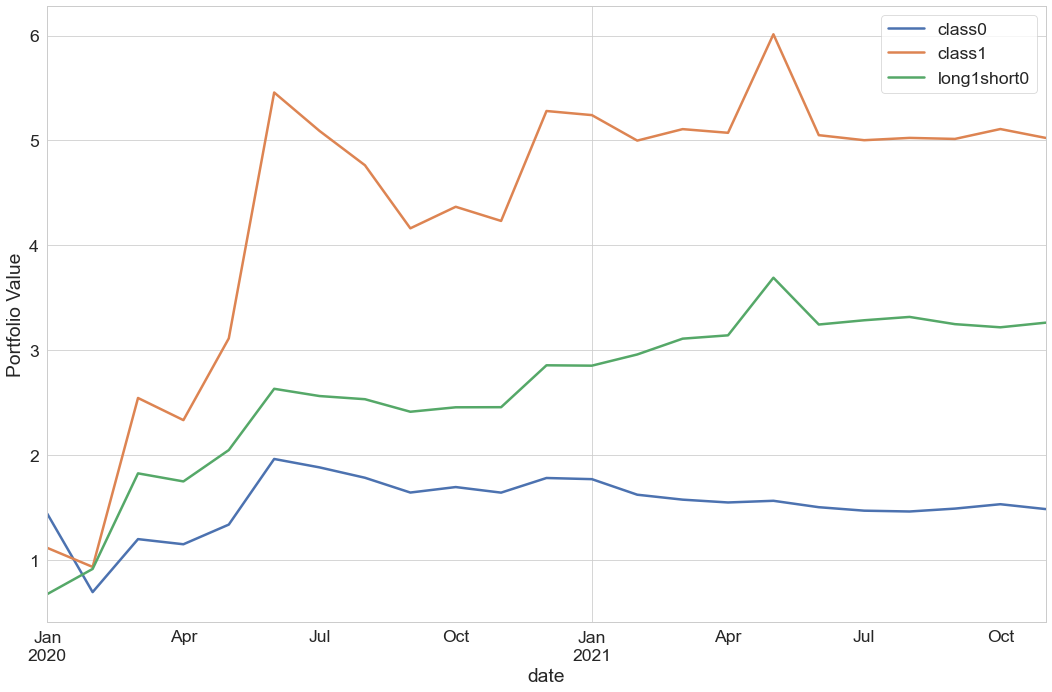

In [230]:
dfs_cumprod = (1. + dfs).cumprod()
dfs_cumprod.plot(figsize=(15, 10), alpha=1.0, linewidth=2.5, ylabel="Portfolio Value")
plt.tight_layout() # remove whitespace around plot
path = os.path.join("results", datetime.now().strftime("%Y%m%d%H%M%S"))
os.makedirs(path, exist_ok=True)
plt.savefig(os.path.join(path, "plot.png"))

In [231]:
path

'results\\20220822163539'

In [232]:
# path = os.path.join("results", datetime.now().strftime("%Y%m%d%H%M%S"))


# os.makedirs(path, exist_ok=True)
# plt.savefig(os.path.join(path, "plot.png"))

In [233]:
(np.log(dfs+1)).mean()

class0         0.017186
class1         0.070181
long1short0    0.051410
dtype: float64

In [234]:
(1 + dfs).prod()

class0         1.484807
class1         5.023718
long1short0    3.262266
dtype: float64

In [235]:
# Arithmetic mean
dfs.mean()

class0         0.042541
class1         0.116181
long1short0    0.073640
dtype: float64

In [236]:
# Geometric mean
((dfs+1).prod() ** (1 / len(dfs)) - 1)

class0         0.017335
class1         0.072703
long1short0    0.052754
dtype: float64

In [237]:
# annualized arithmetic mean
(dfs.mean() * 12)

class0         0.510492
class1         1.394167
long1short0    0.883675
dtype: float64

In [238]:
# annualized vol
qs.stats.volatility(dfs, periods=12)

class0         0.820003
class1         1.390719
long1short0    0.840183
dtype: float64

In [239]:
# check volatility
vol = dfs.std(ddof=1) * np.sqrt(12)
dfs.std(ddof=1) * np.sqrt(12)

class0         0.820003
class1         1.390719
long1short0    0.840183
dtype: float64

##### # CAGR OF QUANTSTATS IS WRONLY CALCULATED FOR MONTHLY RETURNS (subtracts 1 from lenght of total months, assum. daily prices...)

In [240]:
# Wrong. cum. annualized growth rate
qs.stats.cagr(dfs, compounded=True)

class0         0.240685
class1         1.412530
long1short0    0.906212
dtype: float64

In [241]:
# Wrong
cagr = (dfs+1).prod() ** (12/(len(dfs)-1)) - 1
print(cagr)

class0         0.240618
class1         1.412001
long1short0    0.905906
dtype: float64


In [242]:
cagr = (dfs+1).prod() ** (12/(len(dfs)-1)) - 1

In [243]:
cagr

class0         0.240618
class1         1.412001
long1short0    0.905906
dtype: float64

In [244]:
# Correct
cagr = (dfs+1).prod() ** (12/len(dfs)) - 1
print(cagr)

class0         0.229043
class1         1.321412
long1short0    0.853204
dtype: float64


In [245]:
# wrong, if mean is >1, will convert to pct_change... (class 1 is such a case)
qs.stats.sharpe(dfs, periods=12)

class0         0.622549
class1         1.002479
long1short0    1.051765
dtype: float64

In [246]:
# Check Sharpe Ratio
sharpe = dfs.mean(axis=0) / dfs.std() * np.sqrt(12)
dfs.mean(axis=0) / dfs.std() * np.sqrt(12)

class0         0.622549
class1         1.002479
long1short0    1.051765
dtype: float64

In [247]:
# Check Sharpe Ratio 2
(dfs.mean() * 12) / (dfs.std(ddof=1) * np.sqrt(12))

class0         0.622549
class1         1.002479
long1short0    1.051765
dtype: float64

In [248]:
# Sharpe Ratio with avg. geometric returns
((dfs+1).prod() ** (12/ len(dfs)) - 1) / (dfs.std(ddof=1) * np.sqrt(12))

class0         0.279320
class1         0.950165
long1short0    1.015498
dtype: float64

In [249]:
cagr / (dfs.std(ddof=1) * np.sqrt(12))

class0         0.279320
class1         0.950165
long1short0    1.015498
dtype: float64

In [250]:
cagr/vol

class0         0.279320
class1         0.950165
long1short0    1.015498
dtype: float64

In [251]:
(dfs.mean() * 12)

class0         0.510492
class1         1.394167
long1short0    0.883675
dtype: float64

In [252]:
(dfs.std(ddof=1) * np.sqrt(12))

class0         0.820003
class1         1.390719
long1short0    0.840183
dtype: float64

In [253]:
# Kurtosis
dfs.kurtosis(axis=0)

class0          3.777333
class1         12.410526
long1short0     9.705945
dtype: float64

In [254]:
kurt =qs.stats.kurtosis(dfs)
kurt

class0          3.777333
class1         12.410526
long1short0     9.705945
dtype: float64

In [255]:
# Skewness
skew = dfs.skew()
skew

class0         1.051275
class1         3.341624
long1short0    2.588564
dtype: float64

In [256]:
qs.stats.skew(dfs)

class0         1.051275
class1         3.341624
long1short0    2.588564
dtype: float64

In [280]:
dfsp = dfs.copy()

In [281]:
# dfsp = pd.concat([pd.DataFrame([[0, 0]], columns=dfsp.columns), dfsp], ignore_index=False)

In [282]:
dfsp.head()

,class0,class1,long1short0
date,,,
2020-01-31,0.440820,0.115048,-0.325772
2020-02-29,-0.518864,-0.162887,0.355977
2020-03-31,0.728928,1.725688,0.996760
2020-04-30,-0.040891,-0.082998,-0.042107
2020-05-31,0.163143,0.334069,0.170926


In [283]:
dfs.index[0] - MonthEnd(1)

Timestamp('2019-12-31 00:00:00')

In [284]:
dfsp.loc[dfsp.index[0] - MonthEnd(1)] = [0] * dfsp.shape[1]

dfsp = dfsp.sort_index()

In [285]:
dfsp

,class0,class1,long1short0
date,,,
2019-12-31,0.000000,0.000000,0.000000
2020-01-31,0.440820,0.115048,-0.325772
2020-02-29,-0.518864,-0.162887,0.355977
2020-03-31,0.728928,1.725688,0.996760
2020-04-30,-0.040891,-0.082998,-0.042107
2020-05-31,0.163143,0.334069,0.170926
2020-06-30,0.467871,0.753239,0.285368
2020-07-31,-0.040914,-0.067202,-0.026287
2020-08-31,-0.052468,-0.064229,-0.011762


In [286]:
prices =(1 + dfsp).cumprod()

In [287]:
prices.head()

,class0,class1,long1short0
date,,,
2019-12-31,1.000000,1.000000,1.000000
2020-01-31,1.440820,1.115048,0.674228
2020-02-29,0.693230,0.933421,0.914237
2020-03-31,1.198545,2.544214,1.825513
2020-04-30,1.149535,2.333048,1.748645


In [288]:
 prices.expanding(min_periods=0).max().head()

,class0,class1,long1short0
date,,,
2019-12-31,1.00000,1.000000,1.000000
2020-01-31,1.44082,1.115048,1.000000
2020-02-29,1.44082,1.115048,1.000000
2020-03-31,1.44082,2.544214,1.825513
2020-04-30,1.44082,2.544214,1.825513


In [289]:
(prices / prices.expanding(min_periods=0).max())

,class0,class1,long1short0
date,,,
2019-12-31,1.000000,1.000000,1.000000
2020-01-31,1.000000,1.000000,0.674228
2020-02-29,0.481136,0.837113,0.914237
2020-03-31,0.831849,1.000000,1.000000
2020-04-30,0.797833,0.917002,0.957893
2020-05-31,0.927994,1.000000,1.000000
2020-06-30,1.000000,1.000000,1.000000
2020-07-31,0.959086,0.932798,0.973713
2020-08-31,0.908765,0.872885,0.962260


In [290]:
prices

,class0,class1,long1short0
date,,,
2019-12-31,1.000000,1.000000,1.000000
2020-01-31,1.440820,1.115048,0.674228
2020-02-29,0.693230,0.933421,0.914237
2020-03-31,1.198545,2.544214,1.825513
2020-04-30,1.149535,2.333048,1.748645
2020-05-31,1.337073,3.112446,2.047533
2020-06-30,1.962651,5.456861,2.631834
2020-07-31,1.882350,5.090150,2.562650
2020-08-31,1.783588,4.763212,2.532508


In [291]:
(prices / prices.expanding().max()).min()

class0         0.481136
class1         0.762680
long1short0    0.674228
dtype: float64

In [292]:
(prices / prices.expanding().max()).min() - 1

class0        -0.518864
class1        -0.237320
long1short0   -0.325772
dtype: float64

In [293]:
# Max. DD is correctly calculated.
qs.stats.max_drawdown(dfs)

class0        -0.518864
class1        -0.237320
long1short0   -0.128133
dtype: float64

In [308]:
qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfsp))["long1short0"].sort_values(by="max drawdown", ascending=True)

,start,valley,end,days,max drawdown,99% max drawdown
0,2020-01-31,2020-01-31,2020-03-31,60,-32.577209,-8.576251
4,2021-06-30,2021-10-31,2021-11-30,153,-12.813337,-12.093217
2,2020-07-31,2020-09-30,2020-12-31,153,-8.316323,-6.705406
1,2020-04-30,2020-04-30,2020-05-31,31,-4.210733,0.000000
3,2021-01-31,2021-01-31,2021-02-28,28,-0.123675,0.000000


In [309]:
maxdd = (prices / prices.expanding().max()).min() - 1

In [310]:
maxdd

class0        -0.518864
class1        -0.237320
long1short0   -0.325772
dtype: float64

In [311]:
(prices / prices.expanding().max())

,class0,class1,long1short0
date,,,
2019-12-31,1.000000,1.000000,1.000000
2020-01-31,1.000000,1.000000,0.674228
2020-02-29,0.481136,0.837113,0.914237
2020-03-31,0.831849,1.000000,1.000000
2020-04-30,0.797833,0.917002,0.957893
2020-05-31,0.927994,1.000000,1.000000
2020-06-30,1.000000,1.000000,1.000000
2020-07-31,0.959086,0.932798,0.973713
2020-08-31,0.908765,0.872885,0.962260


In [312]:
maxdd["class0"]

-0.5188644163378537

In [313]:
qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfs))["class0"].sort_values(by="max drawdown", ascending=False)

,start,valley,end,days,max drawdown,99% max drawdown
1,2020-07-31,2021-08-31,2021-11-30,487.0,-25.512913,-25.115708
0,2020-02-29,2020-02-29,2020-06-30,122.0,-51.886442,-20.216654
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
a = qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfs))["class0"].sort_values(by="max drawdown", ascending=True)["max drawdown"].iloc[0] / 100

In [315]:
a == maxdd[0]

True

In [316]:
qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfs))["class0"].sort_values(by="max drawdown", ascending=True)["days"].iloc[0]

122.0

In [317]:
qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfs))["class1"].sort_values(by="max drawdown", ascending=True)["days"].iloc[0]

304

In [318]:
dfsp

,class0,class1,long1short0
date,,,
2019-12-31,0.000000,0.000000,0.000000
2020-01-31,0.440820,0.115048,-0.325772
2020-02-29,-0.518864,-0.162887,0.355977
2020-03-31,0.728928,1.725688,0.996760
2020-04-30,-0.040891,-0.082998,-0.042107
2020-05-31,0.163143,0.334069,0.170926
2020-06-30,0.467871,0.753239,0.285368
2020-07-31,-0.040914,-0.067202,-0.026287
2020-08-31,-0.052468,-0.064229,-0.011762


In [319]:
dd_days=[]
for columname in dfsp.columns:
    dd_days.append(qs.stats.drawdown_details(qs.stats.to_drawdown_series(dfsp))[columname].sort_values(by="max drawdown", ascending=True)["days"].iloc[0])
dd_days = pd.Series(dd_days, index=dfsp.columns, name="Max DD days")
dd_days = dd_days.apply(lambda x: f'{x: .0f}')

In [320]:
dd_days

class0          122
class1          304
long1short0      60
Name: Max DD days, dtype: object

In [321]:
maxdd.abs()

class0         0.518864
class1         0.237320
long1short0    0.325772
dtype: float64

In [322]:
# with wrong cagr
qs.stats.cagr(dfs) / qs.stats.max_drawdown(dfs).abs()

class0         0.463869
class1         5.952015
long1short0    7.072413
dtype: float64

In [323]:
# with wrong cagr
qs.stats.cagr(dfs) / maxdd.abs()

class0         0.463869
class1         5.952015
long1short0    2.781737
dtype: float64

In [324]:
# with wrong cagr
qs.stats.calmar(dfs)

class0         0.463869
class1         5.952015
long1short0    7.072413
dtype: float64

In [325]:
# with correct cagr
cagr / qs.stats.max_drawdown(dfs).abs()

class0         0.441431
class1         5.568071
long1short0    6.658715
dtype: float64

In [326]:
# with correct cagr
calmar = cagr / maxdd.abs()

In [327]:
# cumulative return
cumr = (1+dfs).prod() - 1

In [328]:
# alpha beta

In [329]:
# only intercept or with regressor:
X = np.array([np.ones_like(sp500), sp500]).T

In [330]:
alphabeta = np.linalg.inv(X.T@X)@X.T@dfs

In [331]:
alphabeta

,class0,class1,long1short0
0,0.058100,0.173372,0.115272
1,-0.858528,-3.155770,-2.297242


In [332]:
# alpha (annualized), beta
alpha = alphabeta.iloc[0, :] * 12
beta = alphabeta.iloc[1, :]

In [333]:
# mean (annualized)
mean = dfs.mean() * 12

In [334]:
mean

class0         0.510492
class1         1.394167
long1short0    0.883675
dtype: float64

In [335]:
perfstats = [cumr, cagr, mean, vol, sharpe, maxdd, dd_days, calmar, skew, kurt, alpha, beta] # then here.
# perfstats = [vol, cagr, sharpe] # then here.

# save results
perfstats = pd.concat(perfstats, axis=1)
perfstats.to_csv(os.path.join(path, "perfstats.csv"))    
dfi.export(perfstats, os.path.join(path, "perfstats.png"))

# export latex code for table
with open(os.path.join(path, "latex.txt"), "w") as text_file:
    text_file.write(perfstats.to_latex(float_format="%.2f"))
    text_file.write("\n")
    text_file.write("% Same table transposed:\n")
    text_file.write("\n")
#     text_file.write(perfstats.T.to_latex(float_format="%.2f"))

C:\Users\Mathiass\AppData\Local\Temp\ipykernel_7420\1904389221.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  text_file.write(perfstats.to_latex(float_format="%.2f"))


In [336]:
path

'results\\20220822163539'

In [148]:
qs.stats.volatility(df_full.iloc[:, 1:], periods=12)

NameError: name 'df_full' is not defined

In [ ]:
(df.index[-1] - df.index[0]).days / 365

In [ ]:
23 / 12

In [ ]:
df.index

In [ ]:
12/23

In [ ]:
((1 + df).prod() ** (12/23))

In [ ]:
qs.stats.cagr(df)

In [ ]:
qs.stats.cagr(df)

In [ ]:
qs.stats.volatility(df, periods=12)

In [ ]:
qs.stats.sharpe(df, periods=12)

In [ ]:
0.763922 / 0.942529

In [ ]:
# mean is annualized * 12, std with sqrt(12)
df.mean() * 12 / (df.std() * np.sqrt(12))

In [ ]:
qs.stats.volatility(df, periods=12)

In [ ]:
df.mean() * 12 / (df.std())

In [ ]:
qs.plots.snapshot(df)

In [ ]:
df.mean() / df.std(ddof=1) * np.sqrt(252)

In [ ]:
qs.reports.plots(df, "full", periods_per_year=12)

In [ ]:
qs.reports.metrics(df, mode="basic", periods_per_year=12)

In [ ]:
help(qs.plots.snapshot)

In [ ]:
# annualized std
np.std(df, ddof=1) * np.sqrt(12)

In [ ]:
qs.reports.html(df, "SPY", periods_per_year=12)

In [ ]:
# a = [1,2,3]

In [ ]:
dfs.mean()